In [1]:
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# merging, loading data and some prepcrocessing for the final user dataframe

In [11]:
with open('users_with_content_df.pkl','rb') as f:
    users_with_content = pickle.load(f)

In [12]:
with open('user_tweets_number.pkl','rb') as f:
    user_tweets_number = pickle.load(f)

In [13]:
with open('user_censor_number.pkl','rb') as f:
    user_censor_number = pickle.load(f)

In [7]:
with open('censored_repost_general_df.pkl','rb') as f:
    censored_repost_general_df = pickle.load(f)
censored_repost_df = censored_repost_general_df[['reposting time','user_id','general_device']]

In [46]:
dropping_ids = list(set(users_with_content['id']) - (set(user_censor_number.keys()) & set(users_with_content['id'])))
dropping_index = list(users_with_content[users_with_content['id'].isin(dropping_ids)].index)
users_with_content = users_with_content.drop(dropping_index)

In [47]:
censor_number = []
total_number = []
for i in tqdm(users_with_content['id']):
    censor_number.append(user_censor_number[i])
    total_number.append(user_tweets_number[i])

users_with_content['#censorship'] = censor_number
users_with_content['#tweets'] = total_number

100%|████████████████████████████████████████████████████████████████| 574348/574348 [00:00<00:00, 587617.61it/s]


In [48]:
# there are some rare cases of discrepancy, we choose the max number
users_with_content['#censorship_f'] = users_with_content[['#censoship','#censorship']].max(axis = 1)

In [49]:
users_with_content = users_with_content.drop(columns=['#censoship','#censorship'])

In [19]:
with open('users_final_df','wb') as f:
    pickle.dump(users_with_content,f)

In [21]:
with open('users_final_df','rb') as f:
    users_with_content = pickle.load(f)

In [21]:
users_with_content

,id,gender,#tweets,#follower,#following,verified,content,location,#censorship_f
0,6309921628,f,56,344,403,False,1.0,河南 许昌,0
1,6007931743,m,2,20,163,False,1.0,江苏 南京,0
2,7471743898,m,5,10,265,False,1.0,其他,0
3,5701747600,f,52,95113,1052,False,1.0,上海 杨浦,0
4,7577162125,m,2,3,190,False,1.0,山东 济南,0
...,...,...,...,...,...,...,...,...,...
574352,6505005302,f,6,21,239,False,1.0,其他,0
574353,1803190527,f,52,1409,2069,False,1.0,浙江,0
574354,5343183078,m,17,148,336,False,1.0,北京 海淀,1
574355,6031048952,f,51,1,1116,False,1.0,海南 海口,1


In [5]:
# load raw_repost df
raw_repost_df_time_device= pd.DataFrame(columns =['reposting time','reposter_device'])
for i in tqdm(range(12)):
    with open('raw_repost_df_%d.pkl' %i,'rb') as f:
        temp_df = pickle.load(f)
    temp_df = temp_df[['reposting time','reposter_device']]
    raw_repost_df_time_device = pd.concat([raw_repost_df_time_device,temp_df])

100%|████████████████████████████████████████████████████████████████████████████| 12/12 [01:37<00:00,  8.16s/it]


In [6]:
with open('raw_repost_df_time_device.pkl','wb') as f:
    pickle.dump(raw_repost_df_time_device,f)

In [53]:
raw_repost_df_time_device_wo_censorship = pd.DataFrame(columns =['reposting time','reposter_device','user_id'])
string1 = '抱歉，由于作者设置，'
string2 = '该微博因被多人投诉'
string3 = '该账号因被投诉违反'
string4 = '该账号因被投诉'
string5 = '查看帮助： 网页链接'
censor_indictions = [string1, string2, string2, string4, string5]
for i in tqdm(range(12)):
    with open('raw_repost_df_w_id_%d.pkl' %i, 'rb') as f:
        temp_df = pickle.load(f)
    record = temp_df['source_weibo_content'].map(
        lambda post: all(((censor_word not in str(post)) for censor_word in censor_indictions))
    )
    temp_df = temp_df[record]
    temp_df = temp_df[['reposting time','reposter_device','user_id']]
    raw_repost_df_time_device_wo_censorship = pd.concat([raw_repost_df_time_device_wo_censorship,temp_df])

100%|████████████████████████████████████████████████████████████████████████████| 12/12 [02:24<00:00, 12.07s/it]


In [ ]:
with open('raw_repost_df_time_device_wo_censorship.pkl','wb') as f:
    pickle.dump(raw_repost_df_time_device_wo_censorship,f)

In [54]:
raw_repost_df_time_device_wo_censorship

,reposting time,reposter_device,user_id
0,Sun Aug 01 03:41:33 +0800 2021,iPhone客户端,5711341129
1,Sun Dec 27 22:39:03 +0800 2020,iPhone客户端,5711341129
2,Sun May 24 09:08:34 +0800 2020,iPhone客户端,5711341129
0,Mon Aug 02 15:54:07 +0800 2021,vivo 全新水滴屏手机,7412051152
1,Mon Aug 02 11:58:25 +0800 2021,vivo 全新水滴屏手机,7412051152
...,...,...,...
58,Wed May 19 23:11:36 +0800 2021,华为手机,6520895892
59,Wed May 19 23:11:30 +0800 2021,华为手机,6520895892
0,Sun May 16 17:01:50 +0800 2021,nova8 我由我掌镜,7547229881
1,Sat May 01 08:08:02 +0800 2021,nova8 我由我掌镜,7547229881


In [55]:
refined_list = []
generalised_device_list = list(raw_repost_df_time_device_wo_censorship['reposter_device'])
for i in range(len(generalised_device_list)):
    # Apple devices
    if type(generalised_device_list[i]) is str:
        if any(x in str(generalised_device_list[i]) for x in ['iPhone','iPad','Mac']):
            refined_list.append('Apple')
        elif any(x in str(generalised_device_list[i]) for x in ['浏览器', '微博']):
            refined_list.append('Web')
        elif any(x in str(generalised_device_list[i]) for x in ['Huawei','nova','华为','HUAWEI','nova','Harmony']):
            refined_list.append('Huawei')
        elif any(x in str(generalised_device_list[i]) for x in ['荣耀']):
            refined_list.append('Honor')
        elif any(x in str(generalised_device_list[i]) for x in ['小米', 'Redmi','红米']):
            refined_list.append('XiaoMi')
        elif any(x in str(generalised_device_list[i]) for x in ['vivo']):
            refined_list.append('vivo')
        elif any(x in str(generalised_device_list[i]) for x in ['OPPO']):
            refined_list.append('OPPO')
        elif any(x in str(generalised_device_list[i]) for x in ['三星','Samsung']):
            refined_list.append('Samsung')
        elif any(x in str(generalised_device_list[i]) for x in ['android','Android']):
            refined_list.append('General Andoid')
        elif any(x in str(generalised_device_list[i]) for x in ['realme','真我']):
            refined_list.append('Realme')
        elif any(x in str(generalised_device_list[i]) for x in ['iQOO']):
            refined_list.append('IQOO')
        elif any(x in str(generalised_device_list[i]) for x in ['一加','OnePlus']):
            refined_list.append('OnePlus')
        else:
            refined_list.append('other')
    else:
        refined_list.append('NaN')

In [56]:
raw_repost_df_time_device_wo_censorship['general_device'] = refined_list

In [57]:
raw_repost_df_time_device_wo_censorship

,reposting time,reposter_device,user_id,general_device
0,Sun Aug 01 03:41:33 +0800 2021,iPhone客户端,5711341129,Apple
1,Sun Dec 27 22:39:03 +0800 2020,iPhone客户端,5711341129,Apple
2,Sun May 24 09:08:34 +0800 2020,iPhone客户端,5711341129,Apple
0,Mon Aug 02 15:54:07 +0800 2021,vivo 全新水滴屏手机,7412051152,vivo
1,Mon Aug 02 11:58:25 +0800 2021,vivo 全新水滴屏手机,7412051152,vivo
...,...,...,...,...
58,Wed May 19 23:11:36 +0800 2021,华为手机,6520895892,Huawei
59,Wed May 19 23:11:30 +0800 2021,华为手机,6520895892,Huawei
0,Sun May 16 17:01:50 +0800 2021,nova8 我由我掌镜,7547229881,Huawei
1,Sat May 01 08:08:02 +0800 2021,nova8 我由我掌镜,7547229881,Huawei


In [58]:
with open('raw_repost_df_time_device_wo_censorship_generalized.pkl','wb') as f:
    pickle.dump(raw_repost_df_time_device_wo_censorship,f)

In [107]:
raw_repost_df_time_device

,reposting time,reposter_device
0,Sun Aug 01 03:41:33 +0800 2021,iPhone客户端
1,Sun Dec 27 22:39:03 +0800 2020,iPhone客户端
2,Sun May 24 09:08:34 +0800 2020,iPhone客户端
0,Mon Aug 02 15:54:07 +0800 2021,vivo 全新水滴屏手机
1,Mon Aug 02 11:58:25 +0800 2021,vivo 全新水滴屏手机
...,...,...
58,Wed May 19 23:11:36 +0800 2021,华为手机
59,Wed May 19 23:11:30 +0800 2021,华为手机
0,Sun May 16 17:01:50 +0800 2021,nova8 我由我掌镜
1,Sat May 01 08:08:02 +0800 2021,nova8 我由我掌镜


In [108]:
refined_list = []
generalised_device_list = list(raw_repost_df_time_device['reposter_device'])
for i in range(len(generalised_device_list)):
    # Apple devices
    if type(generalised_device_list[i]) is str:
        if any(x in str(generalised_device_list[i]) for x in ['iPhone','iPad','Mac']):
            refined_list.append('Apple')
        elif any(x in str(generalised_device_list[i]) for x in ['浏览器', '微博']):
            refined_list.append('Web')
        elif any(x in str(generalised_device_list[i]) for x in ['Huawei','nova','华为','HUAWEI','nova','Harmony']):
            refined_list.append('Huawei')
        elif any(x in str(generalised_device_list[i]) for x in ['荣耀']):
            refined_list.append('Honor')
        elif any(x in str(generalised_device_list[i]) for x in ['小米', 'Redmi','红米']):
            refined_list.append('XiaoMi')
        elif any(x in str(generalised_device_list[i]) for x in ['vivo']):
            refined_list.append('vivo')
        elif any(x in str(generalised_device_list[i]) for x in ['OPPO']):
            refined_list.append('OPPO')
        elif any(x in str(generalised_device_list[i]) for x in ['三星','Samsung']):
            refined_list.append('Samsung')
        elif any(x in str(generalised_device_list[i]) for x in ['android','Android']):
            refined_list.append('General Andoid')
        elif any(x in str(generalised_device_list[i]) for x in ['realme','真我']):
            refined_list.append('Realme')
        elif any(x in str(generalised_device_list[i]) for x in ['iQOO']):
            refined_list.append('IQOO')
        elif any(x in str(generalised_device_list[i]) for x in ['一加','OnePlus']):
            refined_list.append('OnePlus')
        else:
            refined_list.append('other')
    else:
        refined_list.append('NaN')

In [110]:
raw_repost_df_time_device['general_device'] = refined_list

In [112]:
with open('raw_repost_df_time_device_generalized.pkl','wb') as f:
    pickle.dump(raw_repost_df_time_device,f)

In [98]:
users_with_content

,id,gender,#tweets,#follower,#following,verified,content,location,#censorship_f,influence
0,6309921628,f,56,344,403,False,1.0,河南 许昌,0,0
1,6007931743,m,2,20,163,False,1.0,江苏 南京,0,0
2,7471743898,m,5,10,265,False,1.0,其他,0,0
3,5701747600,f,52,95113,1052,False,1.0,上海 杨浦,0,1
4,7577162125,m,2,3,190,False,1.0,山东 济南,0,0
...,...,...,...,...,...,...,...,...,...,...
574352,6505005302,f,6,21,239,False,1.0,其他,0,0
574353,1803190527,f,52,1409,2069,False,1.0,浙江,0,0
574354,5343183078,m,17,148,336,False,1.0,北京 海淀,1,0
574355,6031048952,f,51,1,1116,False,1.0,海南 海口,1,0


In [12]:
with open('raw_repost_df_time_device_wo_censorship_generalized.pkl','rb') as f:
    raw_repost_df_time_device = pickle.load(f)

In [14]:
raw_repost_df_time_device.head()

,reposting time,reposter_device,general_device
0,Sun Aug 01 03:41:33 +0800 2021,iPhone客户端,Apple
1,Sun Dec 27 22:39:03 +0800 2020,iPhone客户端,Apple
2,Sun May 24 09:08:34 +0800 2020,iPhone客户端,Apple
0,Mon Aug 02 15:54:07 +0800 2021,vivo 全新水滴屏手机,vivo
1,Mon Aug 02 11:58:25 +0800 2021,vivo 全新水滴屏手机,vivo


# Detailed Processing and Plotting

## gender

In [74]:
users_with_content.groupby('gender').agg('mean')

,#tweets,#follower,#following,verified,content,#censorship_f
gender,,,,,,
f,36.235357,34861.765891,493.276807,0.070363,1.0,0.914153
m,29.025609,98219.708381,649.059919,0.069125,1.0,1.058108


In [77]:
users_with_content.groupby('gender').size().to_numpy()

array([382190, 192158])

In [75]:
users_with_content.groupby('gender').agg('sum')

,#tweets,#follower,#following,verified,content,#censorship_f
gender,,,,,,
f,13848791,13323818306,188525463,26892,382190.0,349380
m,5577503,18873702723,124722056,13283,192158.0,203324


### Gender Share in Active Users

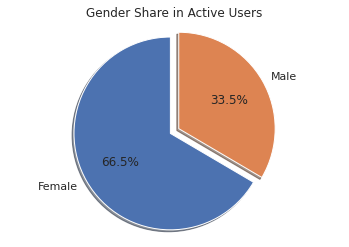

In [96]:
labels = ['Female','Male']
explode = [0.1, 0]  

fig1, ax1 = plt.subplots()
ax1.pie(users_with_content.groupby('gender').size().to_numpy(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Gender Share in Active Users")
plt.savefig('Users_w_content_raw_gender.png')
plt.show()

### Gender Share in All Repost Tweets

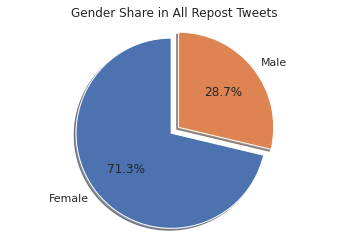

In [110]:
labels = ['Female','Male']
explode = [0.1, 0]  

fig1, ax1 = plt.subplots()
ax1.pie(users_with_content.groupby('gender').agg('sum')['#tweets'].to_numpy(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Share in All Repost Tweets')
plt.savefig('Users_w_content_tweets_gender.png')
plt.show()

### Gender Share in All Censored Repost Tweets

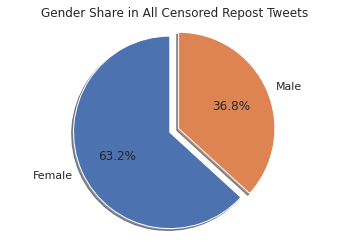

In [102]:
labels = ['Female','Male']
explode = [0.1, 0]  

fig1, ax1 = plt.subplots()
ax1.pie(users_with_content.groupby('gender').agg('sum')['#censorship_f'].to_numpy(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Share in All Censored Repost Tweets')
plt.savefig('Users_w_content_censor_tweets_gender.png')
plt.show()

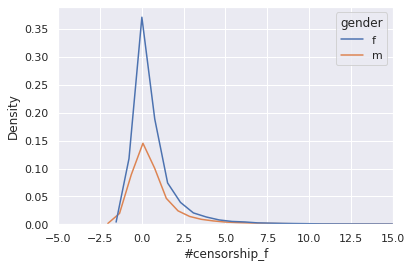

In [71]:
# overlapped kde, will not use
sns.set(style="darkgrid")
gender_plot = sns.kdeplot(data=users_with_content[['gender','#censorship_f']], x="#censorship_f",hue='gender',bw_adjust=2)
gender_plot.set(xlim=(-5, 15))
plt.show()


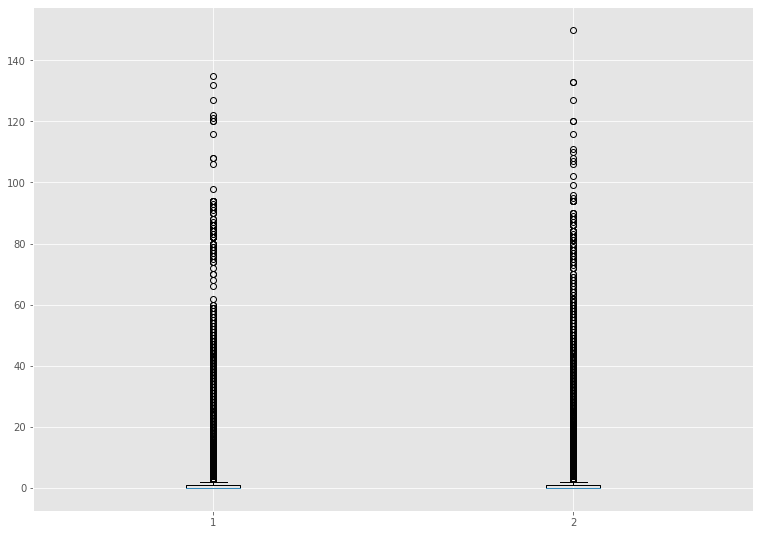

In [82]:
# box plot, will not use
male = users_with_content[users_with_content['gender']=='m']['#censorship_f']
female = users_with_content[users_with_content['gender']=='f']['#censorship_f']
data = [male,female]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.show()

In [78]:
users_with_content

,id,gender,#tweets,#follower,#following,verified,content,location,#censorship_f,influence
0,6309921628,f,56,344,403,False,1.0,河南 许昌,0,0
1,6007931743,m,2,20,163,False,1.0,江苏 南京,0,0
2,7471743898,m,5,10,265,False,1.0,其他,0,0
3,5701747600,f,52,95113,1052,False,1.0,上海 杨浦,0,1
4,7577162125,m,2,3,190,False,1.0,山东 济南,0,0
...,...,...,...,...,...,...,...,...,...,...
574352,6505005302,f,6,21,239,False,1.0,其他,0,0
574353,1803190527,f,52,1409,2069,False,1.0,浙江,0,0
574354,5343183078,m,17,148,336,False,1.0,北京 海淀,1,0
574355,6031048952,f,51,1,1116,False,1.0,海南 海口,1,0


In [72]:
users_with_content['#censorship_f'].describe()

count    574348.000000
mean          0.962316
std           3.519978
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         150.000000
Name: #censorship_f, dtype: float64

## Device

In [38]:
with open('users_with_content_df.pkl','rb') as f:
    users_with_content = pickle.load(f)

In [39]:
users_with_content

,id,gender,#tweets,#follower,#following,verified,content,location,#censoship
0,6309921628,f,2902,344,403,False,1.0,河南 许昌,0
1,6007931743,m,11,20,163,False,1.0,江苏 南京,0
2,7471743898,m,5,10,265,False,1.0,其他,0
3,5701747600,f,3175,95113,1052,False,1.0,上海 杨浦,0
4,7577162125,m,25,3,190,False,1.0,山东 济南,0
...,...,...,...,...,...,...,...,...,...
574352,6505005302,f,36,21,239,False,1.0,其他,0
574353,1803190527,f,6243,1409,2069,False,1.0,浙江,0
574354,5343183078,m,418,148,336,False,1.0,北京 海淀,1
574355,6031048952,f,183,1,1116,False,1.0,海南 海口,1


In [40]:
censored_repost_df.groupby('general_device').size().drop('NaN').index

Index(['Apple', 'General Andoid', 'Honor', 'Huawei', 'IQOO', 'OPPO', 'OnePlus',
       'Realme', 'Samsung', 'Web', 'XiaoMi', 'other', 'vivo'],
      dtype='object', name='general_device')

In [41]:
censored_repost_df.groupby('general_device').size().values

array([184013,  29496,  32571,  81979,   2136,  13860,  36391,   2799,
         1782,   5996,  79729,  37540,  17266,  32559])

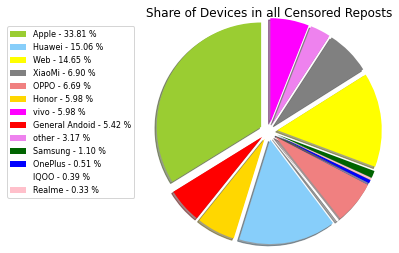

In [137]:
x = list(censored_repost_df.groupby('general_device').size().drop('NaN').index)
explode = [0.1 for i in range(len(x))]  
y = censored_repost_df.groupby('general_device').size().drop('NaN').values
colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','purple']
percent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2,explode=explode,shadow=True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.title("Share of Devices in all Censored Reposts")
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
#plt.savefig('device_pie_censored.png', bbox_inches='tight')

In [92]:
raw_repost_df_time_device_wo_censorship.groupby('general_device').size().drop('NaN').index

Index(['Apple', 'General Andoid', 'Honor', 'Huawei', 'IQOO', 'OPPO', 'OnePlus',
       'Realme', 'Samsung', 'Web', 'XiaoMi', 'other', 'vivo'],
      dtype='object', name='general_device')

In [97]:
raw_repost_df_time_device_wo_censorship.groupby('general_device').size().drop('NaN').values

array([6578755, 1231554, 1141856, 3072122,   84341, 1391448,   97285,
         66171,  195802, 1315863, 1183051,  796036, 1194771])

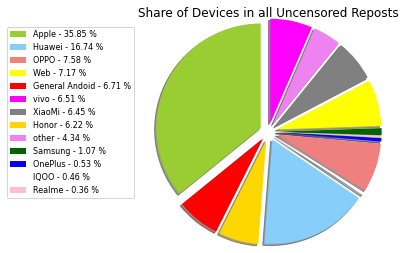

In [99]:
x = list(raw_repost_df_time_device_wo_censorship.groupby('general_device').size().drop('NaN').index)
explode = [0.1 for i in range(len(labels))]  
y = raw_repost_df_time_device_wo_censorship.groupby('general_device').size().drop('NaN').values
colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','purple']
percent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2,explode=explode,shadow=True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.title("Share of Devices in all Uncensored Reposts")
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.savefig('device_pie_uncensored.png', bbox_inches='tight')

In [113]:
raw_repost_df_time_device.groupby('general_device').size().drop('NaN')

general_device
Apple             6762768
General Andoid    1261050
Honor             1174427
Huawei            3154101
IQOO                86477
OPPO              1427839
OnePlus            100084
Realme              67953
Samsung            201798
Web               1395592
XiaoMi            1220591
other              813302
vivo              1227330
dtype: int64

In [105]:
censored_repost_df.groupby('general_device').size().drop('NaN')

general_device
Apple             184013
General Andoid     29496
Honor              32571
Huawei             81979
IQOO                2136
OPPO               36391
OnePlus             2799
Realme              1782
Samsung             5996
Web                79729
XiaoMi             37540
other              17266
vivo               32559
dtype: int64

In [115]:
device_censor_ratio = censored_repost_df.groupby('general_device').size().drop('NaN') / raw_repost_df_time_device.groupby('general_device').size().drop('NaN')

In [116]:
device_censor_ratio.to_numpy()

array([0.02720972, 0.02339003, 0.02773352, 0.02599124, 0.02470021,
       0.02548677, 0.02796651, 0.02622401, 0.02971288, 0.05712916,
       0.03075559, 0.02122951, 0.02652832])

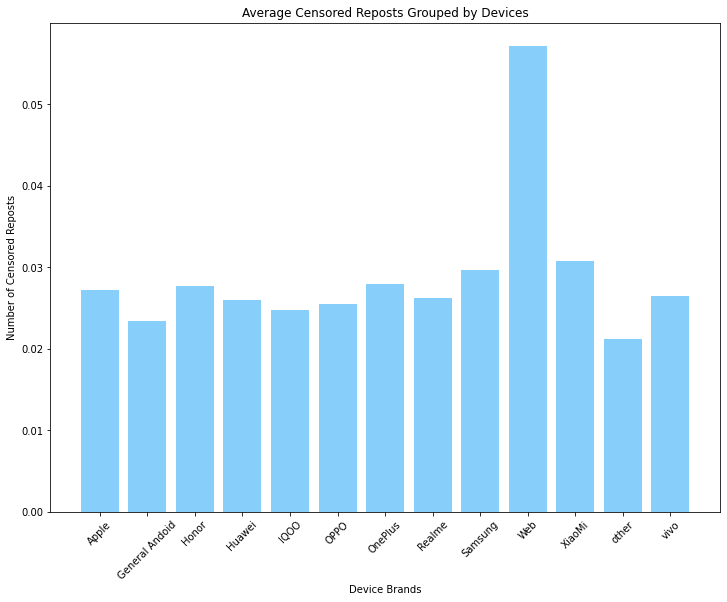

In [132]:
x = list(censored_repost_df.groupby('general_device').size().drop('NaN').index)
ratio = device_censor_ratio.to_numpy()

x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(12, 9))
plt.bar(x_pos, ratio, color='lightskyblue')
xlocs, xlabs = plt.xticks()
plt.xlabel("Device Brands")
plt.ylabel("Number of Censored Reposts")
plt.title("Average Censored Reposts Grouped by Devices")
plt.xticks(x_pos, x,rotation = 45)
plt.savefig('Avg_censored_reposts_grpby_device.png')
plt.show()

## Influence

In [64]:
users_with_content['#follower'].quantile(0.95)

3192.0

In [66]:
influence = []
threshold = users_with_content['#follower'].quantile(0.95)
for i in users_with_content['#follower']:
    if i >= threshold:
        influence.append(1)
    else:
        influence.append(0)

In [67]:
users_with_content['influence'] = influence

In [68]:
users_with_content

,id,gender,#tweets,#follower,#following,verified,content,location,#censorship_f,influence
0,6309921628,f,56,344,403,False,1.0,河南 许昌,0,0
1,6007931743,m,2,20,163,False,1.0,江苏 南京,0,0
2,7471743898,m,5,10,265,False,1.0,其他,0,0
3,5701747600,f,52,95113,1052,False,1.0,上海 杨浦,0,1
4,7577162125,m,2,3,190,False,1.0,山东 济南,0,0
...,...,...,...,...,...,...,...,...,...,...
574352,6505005302,f,6,21,239,False,1.0,其他,0,0
574353,1803190527,f,52,1409,2069,False,1.0,浙江,0,0
574354,5343183078,m,17,148,336,False,1.0,北京 海淀,1,0
574355,6031048952,f,51,1,1116,False,1.0,海南 海口,1,0


In [69]:
users_with_content.groupby('influence').agg('mean')

,#tweets,#follower,#following,verified,content,#censorship_f
influence,,,,,,
0,33.602525,2.161830e+02,516.566880,0.038721,1.0,0.977219
1,38.015703,1.116938e+06,1093.091536,0.663208,1.0,0.679189


In [71]:
users_with_content.groupby('influence').agg('mean')['#censorship_f'].to_numpy()

array([0.97721887, 0.67918944])

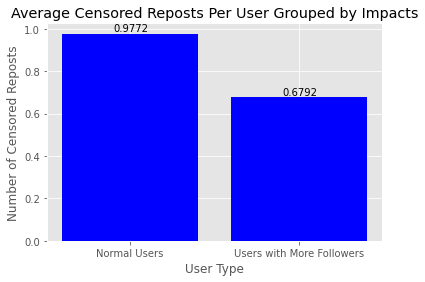

In [93]:
plt.style.use('ggplot')

x = ['Normal Users','Users with More Followers']
energy = users_with_content.groupby('influence').agg('mean')['#censorship_f'].to_numpy().round(4)

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='blue')
xlocs, xlabs = plt.xticks()
plt.xlabel("User Type")
plt.ylabel("Number of Censored Reposts")
plt.title("Average Censored Reposts Per User Grouped by Impacts")

for i, v in enumerate(energy):
    plt.text(xlocs[i*4] + 0.4, v + 0.01, str(v))
plt.xticks(x_pos, x)
plt.savefig('Avg_censored_reposts_grpby_impact.png')
plt.show()

## Verified

In [43]:
users_with_content.groupby('verified').agg('mean')

,#tweets,#follower,#following,content,#censoship
verified,,,,,
False,1193.094157,2220.080626,518.872439,1.0,0.979866
True,7644.970330,771912.871014,898.113255,1.0,0.729035


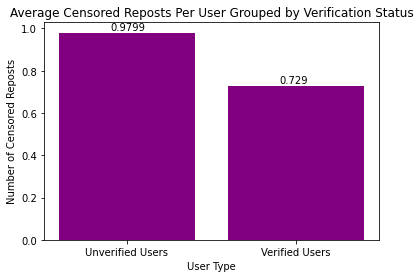

In [50]:
x = ['Unverified Users','Verified Users']
energy = users_with_content.groupby('verified').agg('mean')['#censorship_f'].to_numpy().round(4)

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='Purple')
xlocs, xlabs = plt.xticks()
plt.xlabel("User Type")
plt.ylabel("Number of Censored Reposts")
plt.title("Average Censored Reposts Per User Grouped by Verification Status")

for i, v in enumerate(energy):
    plt.text(xlocs[i*4] + 0.4, v + 0.01, str(v))
plt.xticks(x_pos, x)
plt.savefig('Avg_censored_reposts_grpby_verification.png')
plt.show()

In [144]:
users_with_content

,id,gender,#tweets,#follower,#following,verified,content,location,#censoship
0,6309921628,f,2902,344,403,False,1.0,河南 许昌,0
1,6007931743,m,11,20,163,False,1.0,江苏 南京,0
2,7471743898,m,5,10,265,False,1.0,其他,0
3,5701747600,f,3175,95113,1052,False,1.0,上海 杨浦,0
4,7577162125,m,25,3,190,False,1.0,山东 济南,0
...,...,...,...,...,...,...,...,...,...
574352,6505005302,f,36,21,239,False,1.0,其他,0
574353,1803190527,f,6243,1409,2069,False,1.0,浙江,0
574354,5343183078,m,418,148,336,False,1.0,北京 海淀,1
574355,6031048952,f,183,1,1116,False,1.0,海南 海口,1


## Location

### Preprocessing

In [23]:
# Strip trailing sub-region information for each location
users_with_content['province'] = users_with_content['location'].map(lambda location: location.split(' ')[0])
', '.join(set(users_with_content['province']))

'昵称:贫困地区火火呐, 昵称:胶辽地区总代购, 昵称:整个粤北地区最无聊的人, 贵州, 昵称:本地区后脑勺比较圆的人, 河南, 湖北, 新疆, 重庆, 甘肃, 昵称:赤道地区野人舞娘, 福建, 江西, 昵称:燕山地区社区卫生服务中心, 澳门, 四川, 河北, 山西, 宁夏, 黑龙江, 安徽, 广东, 青海, 台湾, 昵称:广东省粤西地区关注人物, 山东, 认证:超话主持人（大兴安岭地区森林消防超话）, 昵称:中原地区最困小狗, 北京, 内蒙古, 昵称:偏远地区某用户, 认证:中部地区经济社会发展研究中心主任，管理科学与工程博士生导师。, 天津, 云南, 陕西, 吉林, 昵称:新疆塔城地区头条, 西藏, 昵称:易烊千玺地区粉丝团联盟, 上海, 辽宁, 昵称:辽西局部地区青年组麻将冠军, 昵称:辽北地区著名艮人范德彪, 香港, 昵称:京津冀地区反复卸载炉石第一人, 昵称:苏州地区高价收废铁, 海外, 浙江, 昵称:可口可乐亚太地区最大股东, 广西, 其他, 江苏, 昵称:不包邮, 湖南, 昵称:局部地区有咸鱼, 海南'

In [24]:
# Change weird province names to other
weird_prefixes = {"昵称", "认证"}
to_normal = lambda location: location if all((matcher not in location for matcher in weird_prefixes)) else '其他'
users_with_content['province'] = users_with_content['province'].map(to_normal)
', '.join(set(users_with_content['province']))

'贵州, 河南, 湖北, 新疆, 重庆, 甘肃, 福建, 江西, 澳门, 四川, 河北, 山西, 宁夏, 黑龙江, 安徽, 广东, 青海, 台湾, 山东, 北京, 内蒙古, 天津, 云南, 陕西, 吉林, 西藏, 上海, 辽宁, 香港, 海外, 浙江, 广西, 其他, 江苏, 湖南, 海南'

<AxesSubplot:>

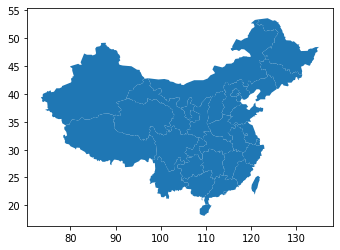

In [17]:
import geopandas
china_geo_df = geopandas.read_file('china.json')

china_geo_df.plot()

In [26]:
user_count_df = users_with_content.groupby('province')[['id']].count()
user_count_df = user_count_df.rename(columns={'id':'#user_with_content'}).reset_index()
user_count_df.head()

,province,#user_with_content
0,上海,23128
1,云南,5351
2,其他,176505
3,内蒙古,3685
4,北京,39563


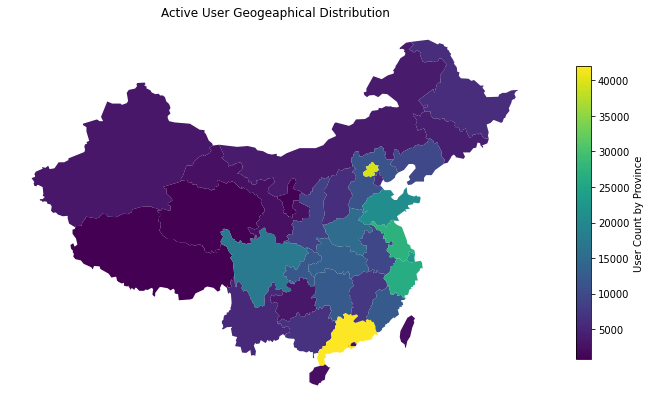

In [50]:
count_map = china_geo_df.merge(user_count_df, left_on='name', right_on='province')
count_map.plot(column='#user_with_content',
               legend=True,
               legend_kwds={'label': "User Count by Province",'shrink': 0.6},
              figsize=(12, 9))
plt.axis('off')
plt.title('Active User Geogeaphical Distribution')
plt.savefig('Active User Geogeaphical Distribution.png')

In [ ]:
user_count_df.head()

In [29]:
user_censor_geo_df = pd.DataFrame(users_with_content.groupby('province')['#censorship_f'].agg('sum')).reset_index()
user_censor_geo_df.head()

,province,#censorship_f
0,上海,21728
1,云南,4611
2,其他,188125
3,内蒙古,3676
4,北京,37333


In [30]:
province_df = user_censor_geo_df.merge(user_count_df, left_on='province',right_on='province')
province_df['#avg/user'] = province_df['#censorship_f']/province_df['#user_with_content']
province_df.head()

,province,#censorship_f,#user_with_content,#avg/user
0,上海,21728,23128,0.939467
1,云南,4611,5351,0.861708
2,其他,188125,176505,1.065834
3,内蒙古,3676,3685,0.997558
4,北京,37333,39563,0.943634


In [33]:
count_map = china_geo_df.merge(province_df, left_on='name',right_on='province')

In [ ]:
count_map

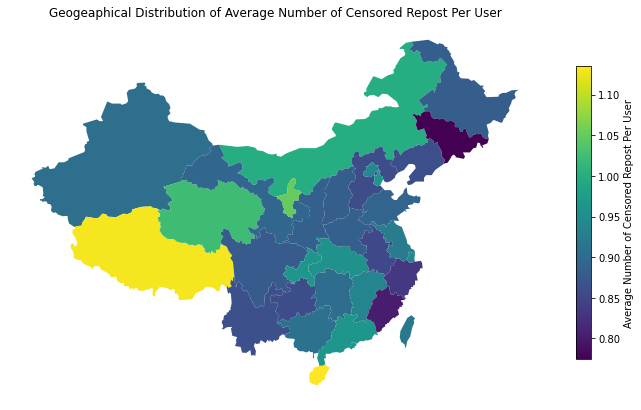

In [36]:
count_map.plot(column='#avg/user',
               legend=True,
               legend_kwds={'label': "Average Number of Censored Repost Per User",'shrink': 0.6},
              figsize=(12, 9))
plt.axis('off')
plt.title('Geogeaphical Distribution of Average Number of Censored Repost Per User')
plt.savefig('Avg_censored_repo_per_user_geo.png')

In [ ]:
count_map.sort_values('#avg/user',ascending=False)

In [38]:
users_with_content['censored_binary'] = users_with_content['#censorship_f'].map(lambda x: True if x>0 else False)

In [39]:
geo_user_binary_df = users_with_content.groupby('province').agg('mean')['censored_binary'].reset_index()

In [40]:
province_df = province_df.merge(geo_user_binary_df, left_on='province',right_on='province')

In [42]:
count_map = china_geo_df.merge(province_df, left_on='name',right_on='province')

In [ ]:
count_map.sort_values(['censored_binary'])

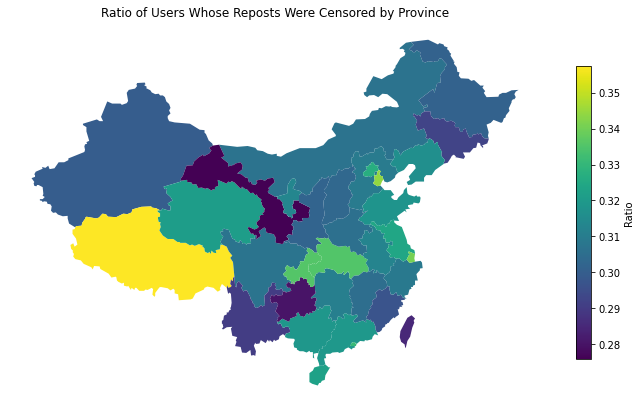

In [49]:
count_map.plot(column='censored_binary',
               legend=True,
               legend_kwds={'label': "Ratio",'shrink': 0.6},
              figsize=(12, 9))
plt.axis('off')
plt.title('Ratio of Users Whose Reposts Were Censored by Province')
plt.savefig('Avg_num_user_w_censorship_by_province.png')

## Grouping Provinces, find the censorship ratio across devices

In [62]:
users_with_content

,id,gender,#tweets,#follower,#following,verified,content,location,#censorship_f,province,censored_binary
0,6309921628,f,56,344,403,False,1.0,河南 许昌,0,河南,False
1,6007931743,m,2,20,163,False,1.0,江苏 南京,0,江苏,False
2,7471743898,m,5,10,265,False,1.0,其他,0,其他,False
3,5701747600,f,52,95113,1052,False,1.0,上海 杨浦,0,上海,False
4,7577162125,m,2,3,190,False,1.0,山东 济南,0,山东,False
...,...,...,...,...,...,...,...,...,...,...,...
574352,6505005302,f,6,21,239,False,1.0,其他,0,其他,False
574353,1803190527,f,52,1409,2069,False,1.0,浙江,0,浙江,False
574354,5343183078,m,17,148,336,False,1.0,北京 海淀,1,北京,True
574355,6031048952,f,51,1,1116,False,1.0,海南 海口,1,海南,True


In [66]:
raw_repost_df_time_device_wo_censorship = raw_repost_df_time_device_wo_censorship.merge(users_with_content[['id','province']], left_on='user_id',right_on='id')

In [67]:
raw_repost_df_time_device_wo_censorship

,reposting time,reposter_device,user_id,general_device,id,province
0,Sun Aug 01 03:41:33 +0800 2021,iPhone客户端,5711341129,Apple,5711341129,其他
1,Sun Dec 27 22:39:03 +0800 2020,iPhone客户端,5711341129,Apple,5711341129,其他
2,Sun May 24 09:08:34 +0800 2020,iPhone客户端,5711341129,Apple,5711341129,其他
3,Mon Aug 02 15:54:07 +0800 2021,vivo 全新水滴屏手机,7412051152,vivo,7412051152,其他
4,Mon Aug 02 11:58:25 +0800 2021,vivo 全新水滴屏手机,7412051152,vivo,7412051152,其他
...,...,...,...,...,...,...
18875587,Wed May 19 23:11:36 +0800 2021,华为手机,6520895892,Huawei,6520895892,其他
18875588,Wed May 19 23:11:30 +0800 2021,华为手机,6520895892,Huawei,6520895892,其他
18875589,Sun May 16 17:01:50 +0800 2021,nova8 我由我掌镜,7547229881,Huawei,7547229881,云南
18875590,Sat May 01 08:08:02 +0800 2021,nova8 我由我掌镜,7547229881,Huawei,7547229881,云南


In [72]:
device_location_uncensored = raw_repost_df_time_device_wo_censorship.groupby(['province','general_device']).size()

In [79]:
device_location_uncensored = device_location_uncensored.reset_index().rename(columns={0:'count'})

In [86]:
censored_repost_df = censored_repost_df.merge(users_with_content[['id','province']], left_on='user_id',right_on='id')

In [91]:
device_location_censored = censored_repost_df.groupby(['province','general_device']).size().reset_index().rename(columns={0:'count'})

In [94]:
device_location_censored

,province,general_device,count
0,上海,Apple,10464
1,上海,General Andoid,848
2,上海,Honor,766
3,上海,Huawei,3364
4,上海,IQOO,52
...,...,...,...
497,黑龙江,Samsung,79
498,黑龙江,Web,574
499,黑龙江,XiaoMi,539
500,黑龙江,other,222


In [93]:
device_location_uncensored 

,province,general_device,count
0,上海,Apple,386736
1,上海,General Andoid,42305
2,上海,Honor,31378
3,上海,Huawei,125474
4,上海,IQOO,2465
...,...,...,...
499,黑龙江,Samsung,2812
500,黑龙江,Web,10716
501,黑龙江,XiaoMi,12996
502,黑龙江,other,8916


In [96]:
device_location_df = device_location_uncensored.merge(device_location_censored,left_on=['province','general_device'],right_on=['province','general_device'])

In [98]:
device_location_df = device_location_df.rename(columns={'count_x':'uncensored_count','count_y':'censored_count'})

In [100]:
device_location_df['censored_ratio'] = device_location_df['censored_count'] / (device_location_df['uncensored_count'] + device_location_df['censored_count'])

In [119]:
# find intersection devices 
import functools
mutual_devices = list(functools.reduce(lambda a,b:set(a)&set(b),device_location_df.groupby('province')['general_device'].unique().values))

In [122]:
mutual_devices.remove('NaN')
mutual_devices

['Honor',
 'vivo',
 'Huawei',
 'XiaoMi',
 'OnePlus',
 'other',
 'Web',
 'Samsung',
 'OPPO',
 'General Andoid',
 'IQOO',
 'Apple']

In [133]:
table = []
for location in device_location_df['province'].unique():
    temp_df = device_location_df[device_location_df['province']==location]
    device_value = []
    for device in mutual_devices:
        device_value.append(float(temp_df[temp_df['general_device']==device]['censored_ratio'].values))
    table.append(device_value)

In [136]:
for location in device_location_df['province'].unique():
    temp_df = device_location_df[device_location_df['province']==location]
    temp_df.sort_values('censored_ratio')

,province,general_device,uncensored_count,censored_count,censored_ratio
0,上海,Apple,386736,10464,0.026344
1,上海,General Andoid,42305,848,0.019651
2,上海,Honor,31378,766,0.023830
3,上海,Huawei,125474,3364,0.026110
4,上海,IQOO,2465,52,0.020660
...,...,...,...,...,...
497,黑龙江,Samsung,2812,79,0.027326
498,黑龙江,Web,10716,574,0.050841
499,黑龙江,XiaoMi,12996,539,0.039823
500,黑龙江,other,8916,222,0.024294


In [139]:
temp_df.sort_values('censored_ratio', ascending=False)[:3]

,province,general_device,uncensored_count,censored_count,censored_ratio
498,黑龙江,Web,10716,574,0.050841
499,黑龙江,XiaoMi,12996,539,0.039823
492,黑龙江,IQOO,865,25,0.028090


In [134]:
table

[[0.02383026381284221,
  0.02725261073799449,
  0.026110309070305343,
  0.033539232467564684,
  0.023874488403819918,
  0.017981854970302198,
  0.024990902947445028,
  0.02143985556307831,
  0.02247191011235955,
  0.019651009199823884,
  0.020659515295987287,
  0.026344410876132932],
 [0.029213088867444514,
  0.03149034973153388,
  0.025798565316691866,
  0.029554655870445343,
  0.03229166666666667,
  0.019952114924181964,
  0.046586256501051235,
  0.023215821152192607,
  0.023617891542419844,
  0.0309031556039173,
  0.014230271668822769,
  0.027289817865734096],
 [0.027801391199238596,
  0.026769060350844077,
  0.027088135317628603,
  0.03191116877335932,
  0.026644915715062535,
  0.020756563665639813,
  0.1310116132409323,
  0.028265898299582,
  0.027292028650495074,
  0.024798239594380767,
  0.02782578638091946,
  0.028501778624171324],
 [0.039032955159373314,
  0.023874161609709357,
  0.02703667350762916,
  0.030678960603520537,
  0.020491803278688523,
  0.019979818365287588,
  0.0

In [125]:
device_location_df[device_location_df['general_device'].isin(mutual_devices)]

,province,general_device,uncensored_count,censored_count,censored_ratio
0,上海,Apple,386736,10464,0.026344
1,上海,General Andoid,42305,848,0.019651
2,上海,Honor,31378,766,0.023830
3,上海,Huawei,125474,3364,0.026110
4,上海,IQOO,2465,52,0.020660
...,...,...,...,...,...
497,黑龙江,Samsung,2812,79,0.027326
498,黑龙江,Web,10716,574,0.050841
499,黑龙江,XiaoMi,12996,539,0.039823
500,黑龙江,other,8916,222,0.024294


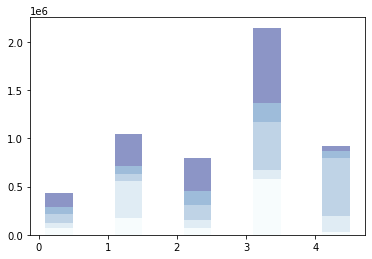

In [107]:
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]
columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]
values = np.arange(0, 2500, 500)
value_increment = 1000
# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)
index = np.arange(len(columns)) + 0.3
bar_width = 0.4
# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

In [108]:
cell_text

[['431.5', '1049.4', '799.6', '2149.8', '917.9'],
 ['292.2', '717.8', '456.4', '1368.5', '865.6'],
 ['213.8', '636.0', '305.7', '1175.2', '796.0'],
 ['124.6', '555.4', '153.2', '677.2', '192.5'],
 ['66.4', '174.3', '75.1', '577.9', '32.0']]

# Time Sries Plot

In [9]:
from datetime import datetime

In [149]:
a.strftime('%Y-%m')

'2020-11'

In [10]:
censored_repost_general_df['Year_Month'] = censored_repost_general_df['reposting time'].map(lambda time: datetime.strptime(time, '%a %b %d %H:%M:%S %z %Y').strftime('%Y-%m'))

In [11]:
censored_repost_general_df.groupby('Year_Month').size()

Year_Month
2018-01      4844
2018-02      3124
2018-03      2602
2018-04      2699
2018-05      2741
2018-06      2896
2018-07      3436
2018-08      3367
2018-09      2790
2018-10      3051
2018-11      3210
2018-12      3170
2019-01      4194
2019-02      3312
2019-03      2819
2019-04      3399
2019-05      3641
2019-06      3838
2019-07      3559
2019-08      4543
2019-09      4090
2019-10      4539
2019-11      4636
2019-12      4539
2020-01      8335
2020-02     13930
2020-03     10533
2020-04     10522
2020-05     10039
2020-06      8552
2020-07      9743
2020-08      9824
2020-09      7671
2020-10      9887
2020-11     11387
2020-12     20931
2021-01     25712
2021-02     30022
2021-03     18010
2021-04     20297
2021-05     29410
2021-06     31981
2021-07    145392
2021-08     40900
dtype: int64

In [15]:
raw_repost_df_time_device.dropna(subset = ['reposting time'], inplace=True)

In [17]:
raw_repost_df_time_device['Year_Month'] = raw_repost_df_time_device['reposting time'].map(lambda time: datetime.strptime(time, '%a %b %d %H:%M:%S %z %Y').strftime('%Y-%m'))

In [20]:
with open('raw_repost_df_time_device_ym.pkl','wb') as f:
    pickle.dump(raw_repost_df_time_device,f)

In [25]:
monthly_censorship_ratio = pd.DataFrame(censored_repost_general_df.groupby('Year_Month').size()/raw_repost_df_time_device.groupby('Year_Month').size()).reset_index().rename(columns={0:'ratio'})

<AxesSubplot:xlabel='Year_Month'>

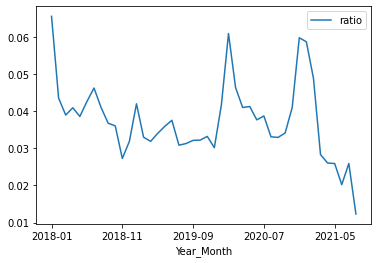

In [30]:
monthly_censorship_ratio.plot('Year_Month','ratio')

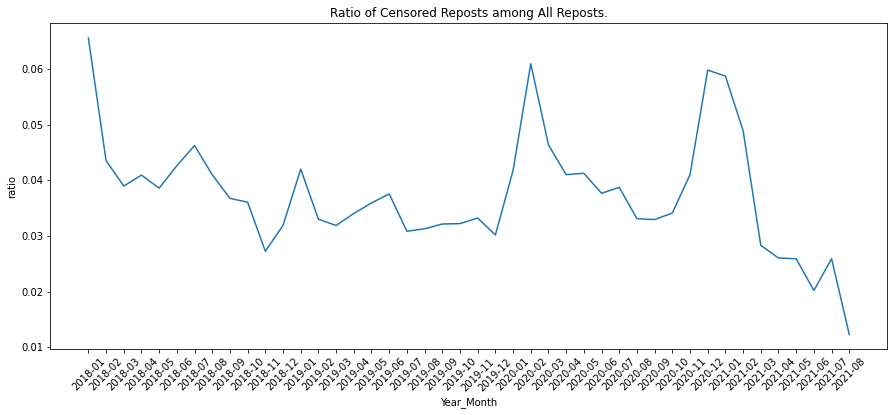

In [36]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Year_Month',y='ratio',data=monthly_censorship_ratio)
plt.xticks(rotation=45)
plt.title("Ratio of Censored Reposts among All Reposts.")
plt.savefig('time_series_ratio.png')
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

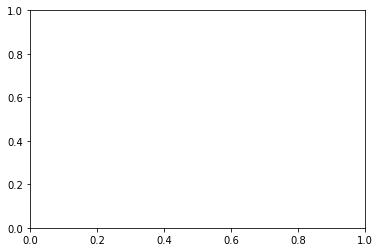

In [27]:
plt.plot(monthly_censorship_ratio)

In [143]:
censored_repost_df['reposting time'][0]

'Tue Nov 03 12:48:56 +0800 2020'

# Do a semantic analysis on comments grouped by Region???

In [ ]:
with open('raw_repost_df_w_id_0.pkl','rb') as f:
    te

In [5]:
test_df.head()

,reposting time,reposter_device,#likes,#comments,#reposts,repost_weibo_comment,source_user_id,source_user_nickname,source_weibo_device,#source_weibo_likes,#source_weibo_comments,source_weibo_reposts,source_weibo_content,user_id
0,Sun Aug 01 03:41:33 +0800 2021,iPhone客户端,1.0,0,0,转发微博,6804337464,oneneedless,iPhone客户端,105,3,48,该分享给谁呢 我今天经历的事 我此时此刻正在做的事 我看到的风景 我的单曲循环 我的难过 我...,5711341129
1,Sun Dec 27 22:39:03 +0800 2020,iPhone客户端,0.0,0,0,//@廿一几:转发微博,3674428202,obliviuforu,NaN,1077,24,94,什么都不敢抱太大的希望 这是阴影也是教训,5711341129
2,Sun May 24 09:08:34 +0800 2020,iPhone客户端,3.0,0,0,转发微博,1719232542,那英,iPad客户端,117079,26148,96958,妈的，最烦装逼的人！,5711341129
0,Mon Aug 02 15:54:07 +0800 2021,vivo 全新水滴屏手机,0.0,0,0,转发微博,1407590331.0,复兴生活馆,微博 weibo.com,8189,473,10078,被世界遗忘的角落，只有植物缓缓生长，证明时间的流逝,7412051152
1,Mon Aug 02 11:58:25 +0800 2021,vivo 全新水滴屏手机,0.0,0,0,转发微博,6532230551.0,無端Cathyyy,iPhone客户端,72340,1156,15652,可不可以把运动Bra的代言也给女运动员们啊，女明星那些犹穿外套半遮面的照片又看不出来支撑强度...,7412051152


In [183]:
with open('censored_repost_general_df.pkl','rb') as f:
    censored_repost_general_df_ = pickle.load(f)

In [184]:
censored_repost_general_df_

,reposting time,reposter_device,#likes,#comments,#reposts,repost_weibo_comment,source_user_id,source_user_nickname,source_weibo_device,#source_weibo_likes,#source_weibo_comments,source_weibo_reposts,source_weibo_content,user_id,general_device
0,Tue Nov 03 12:48:56 +0800 2020,华为Mate 9保时捷设计,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,1113092764,Huawei
1,Mon Oct 05 08:23:45 +0800 2020,华为Mate 9保时捷设计,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反法律法规和《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,1113092764,Huawei
2,Wed Sep 30 09:20:33 +0800 2020,华为Mate 9保时捷设计,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,1113092764,Huawei
3,Sun Aug 23 08:31:31 +0800 2020,华为Mate 9保时捷设计,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,1113092764,Huawei
4,Sat Aug 22 06:33:15 +0800 2020,华为Mate 9保时捷设计,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,1113092764,Huawei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69705,Wed Jun 30 13:46:38 +0800 2021,荣耀20 PRO,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,抱歉，由于作者设置，你暂时没有这条微博的查看权限哦。查看帮助： 网页链接,7546832677,Honor
69706,Sat Jun 09 07:57:51 +0800 2018,iPhone 8 Plus,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,5065578524,Apple
69707,Mon Jul 06 08:14:19 +0800 2020,iPhone客户端,0.0,0,0,//@_pumpyumkin:记住了！//@西西里岛岛主金女士:这个真是第一次知道！以后会记...,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,5526765973,Apple
69708,Fri Apr 10 14:18:18 +0800 2020,iPhone客户端,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,5526765973,Apple


In [37]:
censored_repost_general_df

,reposting time,reposter_device,#likes,#comments,#reposts,repost_weibo_comment,source_user_id,source_user_nickname,source_weibo_device,#source_weibo_likes,#source_weibo_comments,source_weibo_reposts,source_weibo_content,user_id,general_device,Year_Month
0,Tue Nov 03 12:48:56 +0800 2020,华为Mate 9保时捷设计,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,1113092764,Huawei,2020-11
1,Mon Oct 05 08:23:45 +0800 2020,华为Mate 9保时捷设计,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反法律法规和《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,1113092764,Huawei,2020-10
2,Wed Sep 30 09:20:33 +0800 2020,华为Mate 9保时捷设计,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,1113092764,Huawei,2020-09
3,Sun Aug 23 08:31:31 +0800 2020,华为Mate 9保时捷设计,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,1113092764,Huawei,2020-08
4,Sat Aug 22 06:33:15 +0800 2020,华为Mate 9保时捷设计,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,1113092764,Huawei,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69705,Wed Jun 30 13:46:38 +0800 2021,荣耀20 PRO,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,抱歉，由于作者设置，你暂时没有这条微博的查看权限哦。查看帮助： 网页链接,7546832677,Honor,2021-06
69706,Sat Jun 09 07:57:51 +0800 2018,iPhone 8 Plus,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,5065578524,Apple,2018-06
69707,Mon Jul 06 08:14:19 +0800 2020,iPhone客户端,0.0,0,0,//@_pumpyumkin:记住了！//@西西里岛岛主金女士:这个真是第一次知道！以后会记...,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,5526765973,Apple,2020-07
69708,Fri Apr 10 14:18:18 +0800 2020,iPhone客户端,0.0,0,0,转发微博,NaN,NaN,NaN,0,0,0,该账号因被投诉违反《微博社区公约》的相关规定，现已无法查看。查看帮助 网页链接,5526765973,Apple,2020-04


In [38]:
raw_repost_df_time_device

,reposting time,reposter_device,Year_Month
0,Sun Aug 01 03:41:33 +0800 2021,iPhone客户端,2021-08
1,Sun Dec 27 22:39:03 +0800 2020,iPhone客户端,2020-12
2,Sun May 24 09:08:34 +0800 2020,iPhone客户端,2020-05
0,Mon Aug 02 15:54:07 +0800 2021,vivo 全新水滴屏手机,2021-08
1,Mon Aug 02 11:58:25 +0800 2021,vivo 全新水滴屏手机,2021-08
...,...,...,...
58,Wed May 19 23:11:36 +0800 2021,华为手机,2021-05
59,Wed May 19 23:11:30 +0800 2021,华为手机,2021-05
0,Sun May 16 17:01:50 +0800 2021,nova8 我由我掌镜,2021-05
1,Sat May 01 08:08:02 +0800 2021,nova8 我由我掌镜,2021-05


In [40]:
with open('users_final_df','rb') as f:
    users_with_content = pickle.load(f)

In [45]:
users_with_content['verified'].sum()

40175

In [48]:
with open('raw_repost_df_time_device_wo_censorship_generalized.pkl','rb') as f:
    g = pickle.load(f)

In [49]:
g

,reposting time,reposter_device,user_id,general_device
0,Sun Aug 01 03:41:33 +0800 2021,iPhone客户端,5711341129,Apple
1,Sun Dec 27 22:39:03 +0800 2020,iPhone客户端,5711341129,Apple
2,Sun May 24 09:08:34 +0800 2020,iPhone客户端,5711341129,Apple
0,Mon Aug 02 15:54:07 +0800 2021,vivo 全新水滴屏手机,7412051152,vivo
1,Mon Aug 02 11:58:25 +0800 2021,vivo 全新水滴屏手机,7412051152,vivo
...,...,...,...,...
58,Wed May 19 23:11:36 +0800 2021,华为手机,6520895892,Huawei
59,Wed May 19 23:11:30 +0800 2021,华为手机,6520895892,Huawei
0,Sun May 16 17:01:50 +0800 2021,nova8 我由我掌镜,7547229881,Huawei
1,Sat May 01 08:08:02 +0800 2021,nova8 我由我掌镜,7547229881,Huawei
